In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

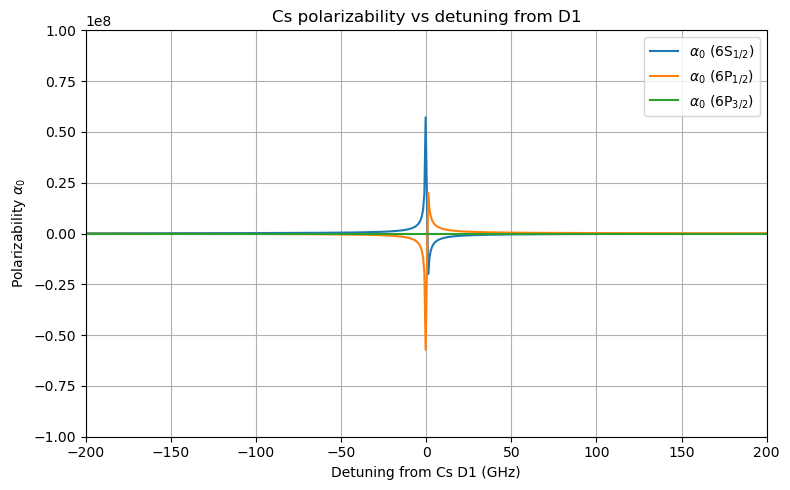

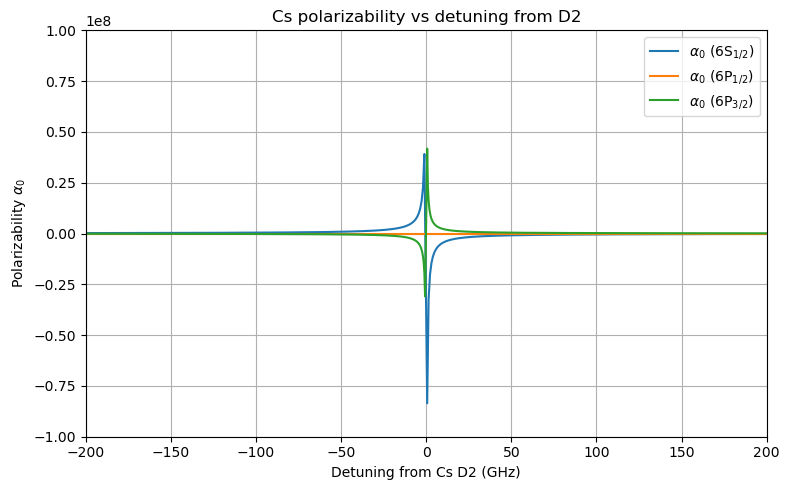

In [30]:
# ---- constants ----
c = 299_792_458.0  # m/s

# Cs D-lines (vacuum) from Steck
lambda_D2_nm = 852.34727582
lambda_D1_nm = 894.59295986

f_D2_Hz = c / (lambda_D2_nm * 1e-9)
f_D1_Hz = c / (lambda_D1_nm * 1e-9)

# ---- load CSV (skip the first metadata row) ----
df = pd.read_csv("Cs1Pol/Cs1_6s.csv", skiprows=1)
df.columns = ["wavelength_nm", "alpha_0", "alpha0_unc", "alpha_2", "alpha2_unc"]

# numeric safety
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["wavelength_nm", "alpha_0"])

# ---- convert wavelength -> frequency and detunings ----
wl_m = df["wavelength_nm"].to_numpy() * 1e-9
f_Hz = c / wl_m

det_D1_GHz_6s = (f_Hz - f_D1_Hz) / 1e9
det_D2_GHz_6s = (f_Hz - f_D2_Hz) / 1e9

alpha_6s = df["alpha_0"].to_numpy()
# alpha0_u_6s = df["alpha0_unc"].to_numpy()
# (optional) sort by detuning so the line plot is not scrambled
i1_6s = np.argsort(det_D1_GHz_6s)
i2_6s = np.argsort(det_D2_GHz_6s)


# ---- load CSV (skip the first metadata row) ----
df = pd.read_csv("Cs1Pol/Cs1_6p1.csv", skiprows=1)
df.columns = ["wavelength_nm", "alpha_0", "alpha0_unc", "alpha_2", "alpha2_unc"]

# numeric safety
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["wavelength_nm", "alpha_0"])

# ---- convert wavelength -> frequency and detunings ----
wl_m = df["wavelength_nm"].to_numpy() * 1e-9
f_Hz = c / wl_m

det_D1_GHz_6p1 = (f_Hz - f_D1_Hz) / 1e9
det_D2_GHz_6p1 = (f_Hz - f_D2_Hz) / 1e9

alpha_6p1 = df["alpha_0"].to_numpy()

# (optional) sort by detuning so the line plot is not scrambled
i1_6p1 = np.argsort(det_D1_GHz_6p1)
i2_6p1 = np.argsort(det_D2_GHz_6p1)

# ---- load CSV (skip the first metadata row) ----
df = pd.read_csv("Cs1Pol/Cs1_6p3.csv", skiprows=1)
df.columns = ["wavelength_nm", "alpha_0", "alpha0_unc", "alpha_2", "alpha2_unc"]

# numeric safety
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df = df.dropna(subset=["wavelength_nm", "alpha_0"])

# ---- convert wavelength -> frequency and detunings ----
wl_m = df["wavelength_nm"].to_numpy() * 1e-9
f_Hz = c / wl_m

det_D1_GHz_6p3 = (f_Hz - f_D1_Hz) / 1e9
det_D2_GHz_6p3 = (f_Hz - f_D2_Hz) / 1e9

alpha_6p3 = df["alpha_0"].to_numpy()

# (optional) sort by detuning so the line plot is not scrambled
i1_6p3 = np.argsort(det_D1_GHz_6p3)
i2_6p3 = np.argsort(det_D2_GHz_6p3)

wavelength_range = 200  # nm around D1 and D2 lines

# ---- plot vs detuning from D1 ----
plt.figure(figsize=(8, 5))
plt.plot(det_D1_GHz_6s[i1_6s], alpha_6s[i1_6s], label=r"$\alpha_0$ (6S$_{1/2}$)")
plt.plot(det_D1_GHz_6p1[i1_6p1], alpha_6p1[i1_6p1], label=r"$\alpha_0$ (6P$_{1/2}$)")
plt.plot(det_D1_GHz_6p3[i1_6p3], alpha_6p3[i1_6p3], label=r"$\alpha_0$ (6P$_{3/2}$)")
plt.xlabel(r"Detuning from Cs D1 (GHz)")
plt.ylabel(r"Polarizability $\alpha_0$")
plt.title("Cs polarizability vs detuning from D1")
plt.xlim([-wavelength_range, wavelength_range])
plt.ylim([-1e8, 1e8])
plt.grid(True)
plt.legend()
plt.tight_layout()

# ---- plot vs detuning from D2 ----
plt.figure(figsize=(8, 5))
plt.plot(det_D2_GHz_6s[i2_6s], alpha_6s[i2_6s], label=r"$\alpha_0$ (6S$_{1/2}$)")
plt.plot(det_D2_GHz_6p1[i2_6p1], alpha_6p1[i2_6p1], label=r"$\alpha_0$ (6P$_{1/2}$)")
plt.plot(det_D2_GHz_6p3[i2_6p3], alpha_6p3[i2_6p3], label=r"$\alpha_0$ (6P$_{3/2}$)")
plt.xlabel(r"Detuning from Cs D2 (GHz)")
plt.ylabel(r"Polarizability $\alpha_0$")
plt.title("Cs polarizability vs detuning from D2")
plt.xlim([-wavelength_range, wavelength_range])
plt.ylim([-1e8, 1e8])
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
